# Pyber Analysis

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# take file path and read the files
city_filepath = "data/city_data.csv"
ride_filepath = "data/ride_data.csv"
city_df = pd.read_csv(city_filepath)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_df = pd.read_csv(ride_filepath)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# merge both the files
city_ride_df = pd.merge(city_df,ride_df, how="outer", on="city")
city_ride_df.head()
city_ride_df["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

In [6]:
# seperate the dataframe based on city type (i.e. "urban", "suburban", "rural")
urban_df = city_ride_df.loc[city_ride_df["type"]=="Urban"]
rural_df = city_ride_df.loc[city_ride_df["type"]=="Rural"]
suburban_df = city_ride_df.loc[city_ride_df["type"]=="Suburban"]

In [7]:
# Calculate average fare per city
urban_average_fare = urban_df.groupby("city")["fare"].mean().values
rural_average_fare = rural_df.groupby("city")["fare"].mean().values
suburban_average_fare = suburban_df.groupby("city")["fare"].mean().values

In [8]:
# Calculate total rides per city
urban_total_rides = urban_df.groupby("city")["ride_id"].count().values
rural_total_rides = rural_df.groupby("city")["ride_id"].count().values
suburban_total_rides = suburban_df.groupby("city")["ride_id"].count().values

In [9]:
# Calculate average drivers per city
urban_drivers = urban_df.groupby("city")["driver_count"].mean().values
rural_drivers = rural_df.groupby("city")["driver_count"].mean().values
suburban_drivers = suburban_df.groupby("city")["driver_count"].mean().values

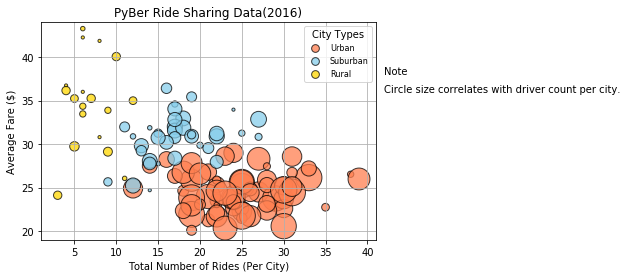

In [10]:
# Bubble plot for Ride sharing data
plt.figure(figsize = (6,4))
plt.title("PyBer Ride Sharing Data(2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
urban = plt.scatter(urban_total_rides, urban_average_fare, marker = "o", facecolor = "coral", edgecolor = "black",s=urban_drivers*10,
            alpha=0.75, label = "Urban")
suburban = plt.scatter(suburban_total_rides, suburban_average_fare, marker = "o", facecolor = "skyblue", edgecolor = "black", s=suburban_drivers*10,
            alpha=0.75, label="Suburban")

rural = plt.scatter(rural_total_rides, rural_average_fare, marker = "o", facecolor = "gold", edgecolor = "black", s=rural_drivers*10,
            alpha=0.75, label = "Rural")

plt.xlim(1,41)
plt.ylim(19,44)
plt.grid()
legends = plt.legend(handles=[urban,suburban, rural], fontsize = 8, title = "City Types", loc = "upper right")
legends.legendHandles[0]._sizes = [60]
legends.legendHandles[1]._sizes = [60] 
legends.legendHandles[2]._sizes = [60]

plt.text(42, 38, "Note")
plt.text(42 ,36, "Circle size correlates with driver count per city.")
plt.savefig("PyberImages/RideSharingData.png")
plt.show()

## Total Fares by City Type

In [11]:
type_group =  city_ride_df.groupby("type").agg({"fare":"sum", "ride_id":"count"})
type_group = type_group.reset_index()
total_fare = type_group["fare"]
types = type_group["type"]
total_rides = type_group["ride_id"]
drivers = city_df.groupby("type")["driver_count"].sum().values

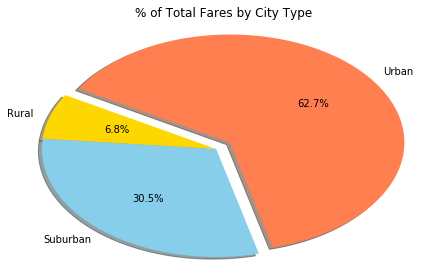

In [12]:
explode = (0,0,0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(total_fare, labels=types, explode=explode, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")
plt.tight_layout()
plt.axis("auto")
plt.savefig("PyberImages/TotalFareByCityType.png")
plt.show()

## Total Rides by City Type

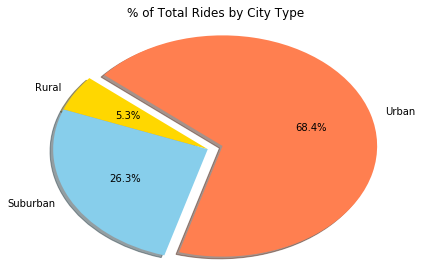

In [15]:
plt.pie(total_rides, labels=types, explode=explode, colors=colors, shadow=True, startangle=140, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")
plt.axis("auto")
plt.tight_layout()
plt.savefig("PyberImages/TotalRidesByCityType.png")
plt.show()

## Total Drivers by City Type

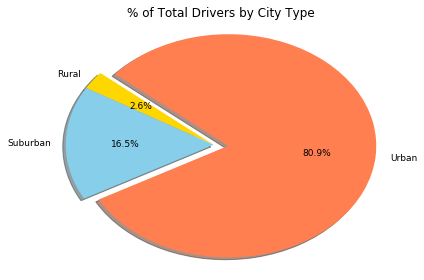

In [16]:
plt.pie(drivers, labels=types, explode=explode, colors=colors, shadow=True, startangle=140, textprops={'fontsize': 9}, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")
plt.axis("auto")
plt.tight_layout()
plt.savefig("PyberImages/TotalDriversByCityType.png")
plt.show()

# Observations

* Urban area has more drivers and more rides, may be because of more population. Rural area has lowest total drivers and lowest ride. However the Average fare is highest in rural area.
* Average fare in Urban area is lesser than rural area. 
* Total fare is higher in urban area then rural.
* Whenever the avaerage fare is low, total number of ride increases.
* Distance for the rides are not given here. If it is given then we can know why people in urban area takes more ride, may be due to greater distance.
* In few urban area, drivers are less but total rides are more.